In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Min 9.999999999999999e-06 Max 0.01 Num params 100


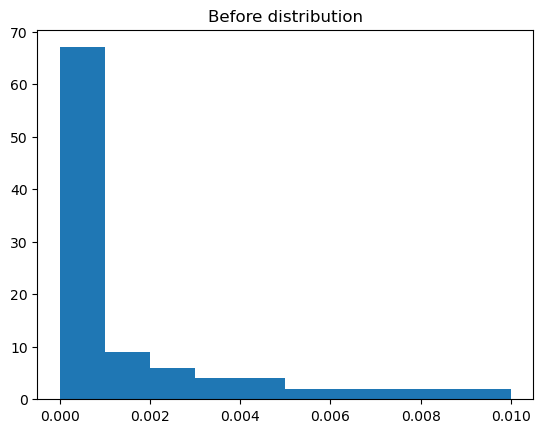

log valued min max -11.512925464970229 -4.605170185988091


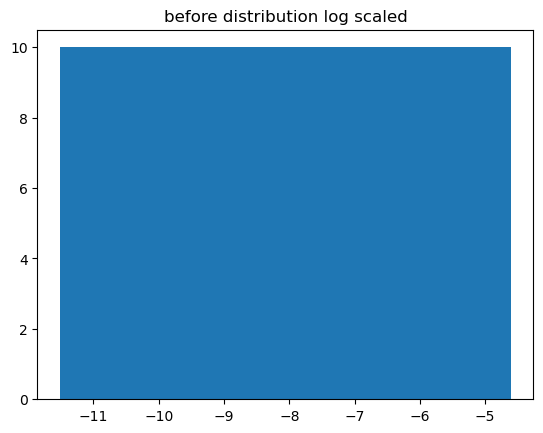

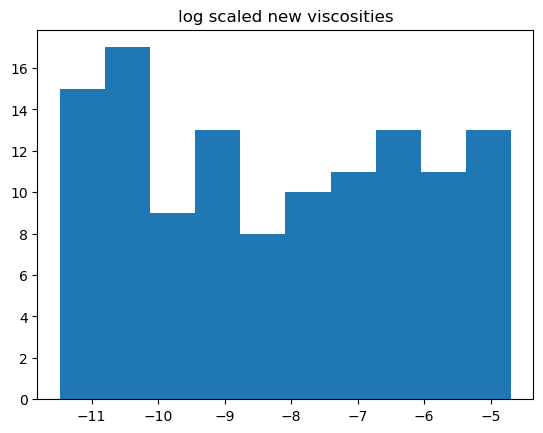

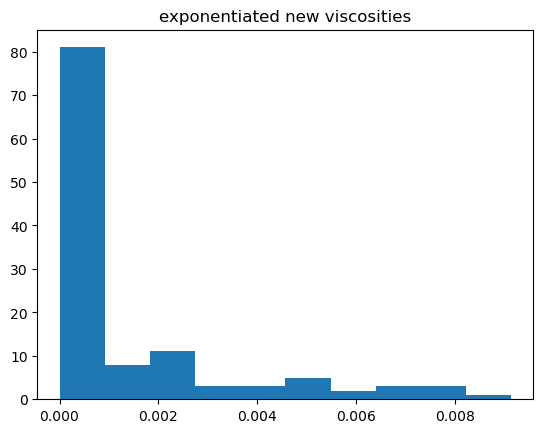

viscositiesgpuone=("0.0001329291894316216" "2.9380279387035334e-05" "0.0006358358856676254" "0.00314288089084011" "8.17949947521167e-05" "0.000684792009557478" "0.00023345864076016249" "0.0005987474910461401" "1.5673095467235405e-05" "8.200518402245828e-05" "2.32335035153901e-05" "5.9750279999602906e-05" "0.00043664735929796326" "0.006584106160121612" "1.8427970406864546e-05" "0.00014656553886225324" "6.963114377829287e-05" "1.6736010167825783e-05" "1.0388823104027935e-05" "0.0020597335357437196" "0.0038842777547031426" "8.569331925053982e-05" "0.0045881565491609705" "0.0019158219548093154" "0.0003699972431463808" "1.2424747083660186e-05" "0.005280796376895365" "4.857295179217165e-05" "0.006153085601625313" "0.0025764174425233167")
viscositiesgputwo=("0.0071144760093434225" "2.9375384576328295e-05" "0.001331121608073689" "4.335281794951564e-05" "0.00037520558551242813" "2.621087878265438e-05" "0.0022673986523780395" "1.3783237455007187e-05" "0.007025166339242158" "1.9634341572933304e-0

In [13]:
viscositiesgpuone="9.999999999999999e-06 1.4174741629268048e-05 2.0092330025650458e-05 2.8480358684358048e-05 4.037017258596558e-05 5.72236765935022e-05 8.111308307896872e-05 0.00011497569953977356 0.00016297508346206434 0.00023101297000831605 0.00032745491628777284 0.0004641588833612782 0.0006579332246575682 0.0009326033468832199 0.0013219411484660286 0.0018738174228603848 0.0026560877829466868 0.0037649358067924675 0.005336699231206312 0.007564633275546291"
viscositiesgputwo="1.072267222010323e-05 1.5199110829529332e-05 2.1544346900318823e-05 3.053855508833412e-05 4.328761281083062e-05 6.135907273413175e-05 8.697490026177834e-05 0.0001232846739442066 0.0001747528400007683 0.0002477076355991711 0.0003511191734215131 0.0004977023564332113 0.0007054802310718645 0.001 0.0014174741629268048 0.002009233002565048 0.002848035868435802 0.004037017258596553 0.00572236765935022 0.008111308307896872"
viscositiesgputhree="1.1497569953977357e-05 1.6297508346206434e-05 2.310129700083158e-05 3.274549162877732e-05 4.641588833612782e-05 6.579332246575683e-05 9.326033468832199e-05 0.00013219411484660288 0.0001873817422860383 0.00026560877829466864 0.00037649358067924675 0.0005336699231206312 0.000756463327554629 0.0010722672220103231 0.0015199110829529332 0.0021544346900318843 0.0030538555088334154 0.004328761281083057 0.006135907273413175 0.008697490026177835"
viscositiesgpufour="1.2328467394420658e-05 1.747528400007683e-05 2.4770763559917088e-05 3.511191734215127e-05 4.977023564332114e-05 7.054802310718646e-05 0.0001 0.00014174741629268049 0.0002009233002565046 0.0002848035868435802 0.0004037017258596558 0.0005722367659350221 0.0008111308307896872 0.0011497569953977356 0.001629750834620645 0.0023101297000831605 0.0032745491628777285 0.004641588833612782 0.006579332246575682 0.0093260334688322"
viscositiesgpufive="1.3219411484660286e-05 1.873817422860383e-05 2.6560877829466838e-05 3.7649358067924715e-05 5.3366992312063123e-05 7.56463327554629e-05 0.00010722672220103231 0.0001519911082952933 0.00021544346900318845 0.0003053855508833416 0.00043287612810830614 0.0006135907273413176 0.0008697490026177834 0.0012328467394420659 0.0017475284000076847 0.0024770763559917113 0.003511191734215131 0.004977023564332114 0.007054802310718645 0.01"
viscosities = [viscositiesgpufive, viscositiesgpufour, viscositiesgpuone, viscositiesgputwo, viscositiesgputhree]
viscosities = " ".join(viscosities).split(' ')
viscosities = [float(v) for v in viscosities]
viscosities = sorted(viscosities)
print('Min', min(viscosities), 'Max', max(viscosities), 'Num params', len(viscosities))
plt.hist(viscosities)
plt.title('Before distribution')
plt.show()

min_val = np.log(min(viscosities))
max_val = np.log(max(viscosities))
print('log valued min max', min_val, max_val)
# Distribution of log values
viscosities = np.asarray(viscosities)
plt.hist(np.log(viscosities))
plt.title('before distribution log scaled')
plt.show()

# Sample parameters uniformly in log space
np.random.seed(42)
num_params = 120 # We add an extra 20 so that we can have 20 be out of domain
viscosities = np.random.uniform(min_val, max_val, size=(num_params))
plt.hist(viscosities)
plt.title('log scaled new viscosities')
plt.show()

plt.hist(np.exp(viscosities))
plt.title('exponentiated new viscosities')
plt.show()

num_proc = 4
proc_vis = [[] for _ in range(num_proc)]
for i, v in enumerate(viscosities):
    proc_vis[i % num_proc].append(v)
viscosities = proc_vis
to_str = lambda i: ['one', 'two', 'three', 'four'][i]
for i, v in enumerate(viscosities):
    v = np.exp(v)
    v = v.tolist()
    v = [f'"{str(i)}"' for i in v]
    print(f'viscositiesgpu{to_str(i)}=({" ".join(v)})')

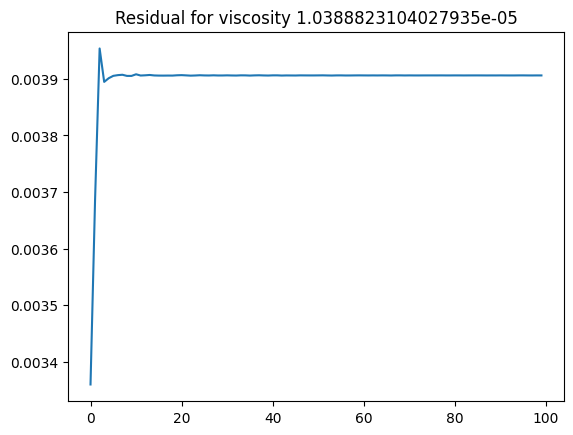

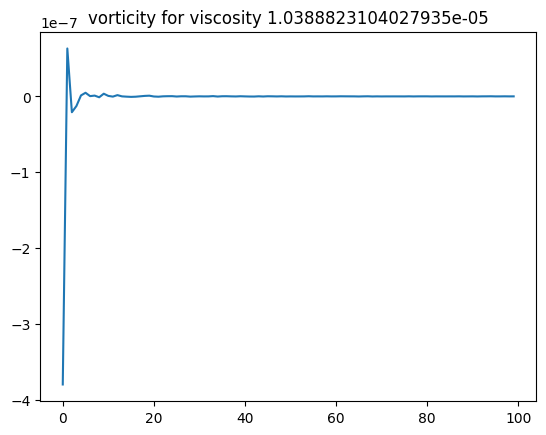

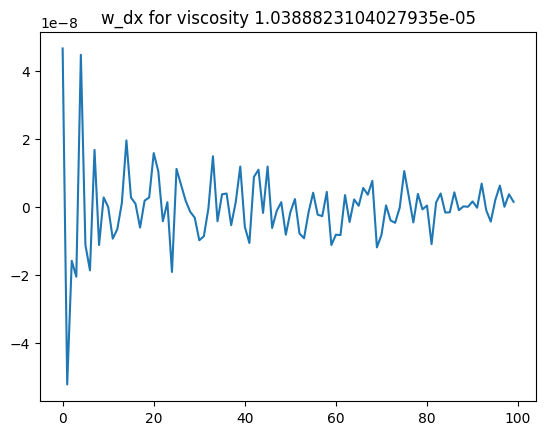

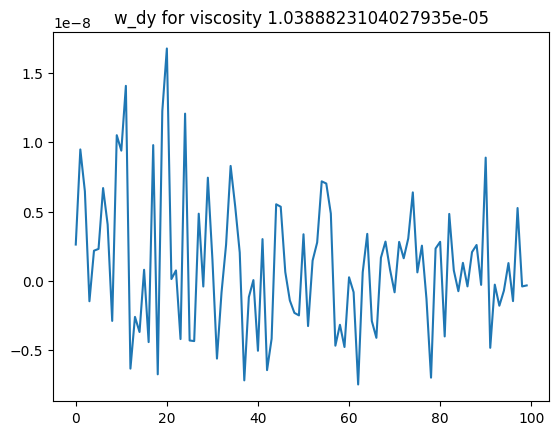

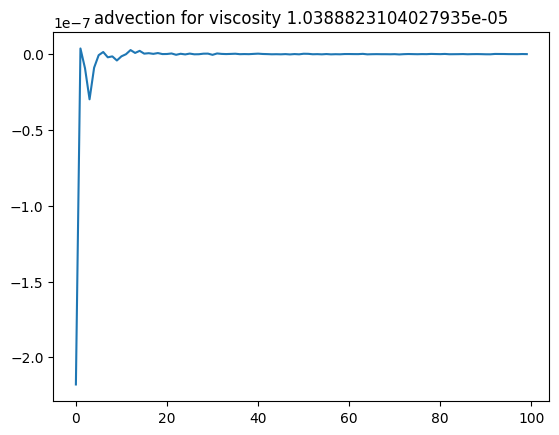

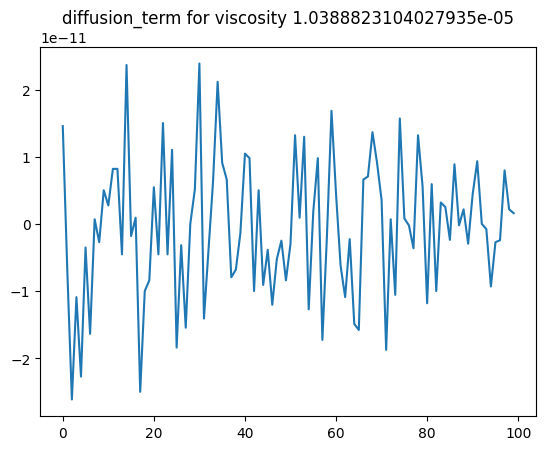

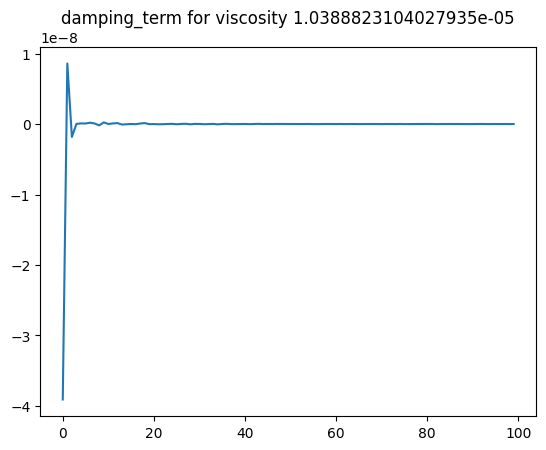

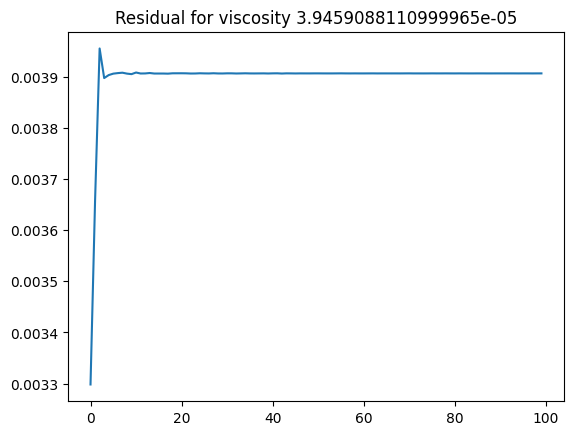

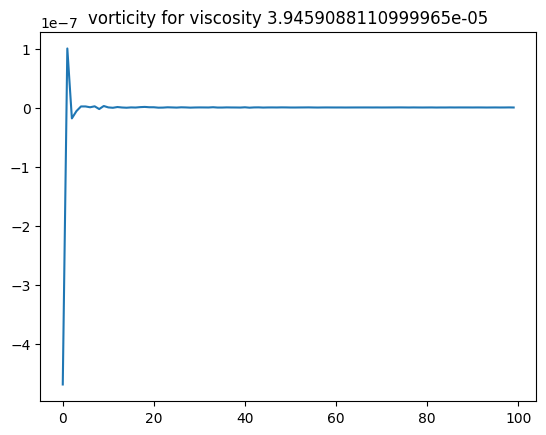

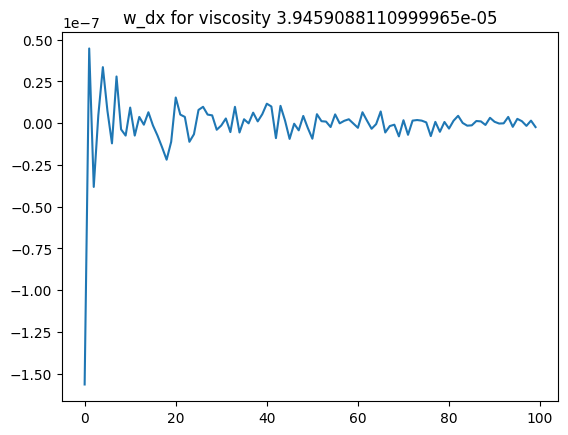

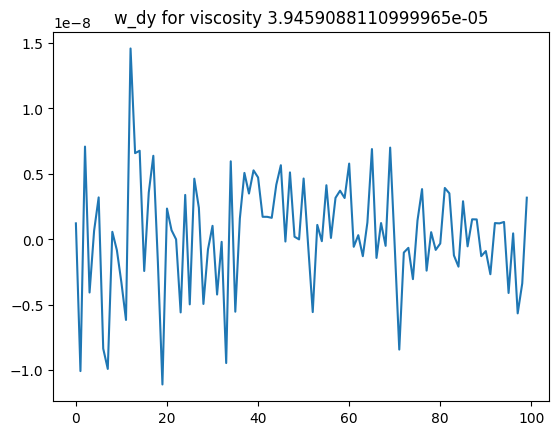

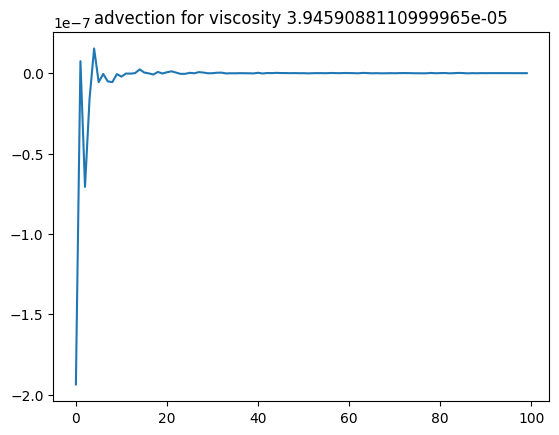

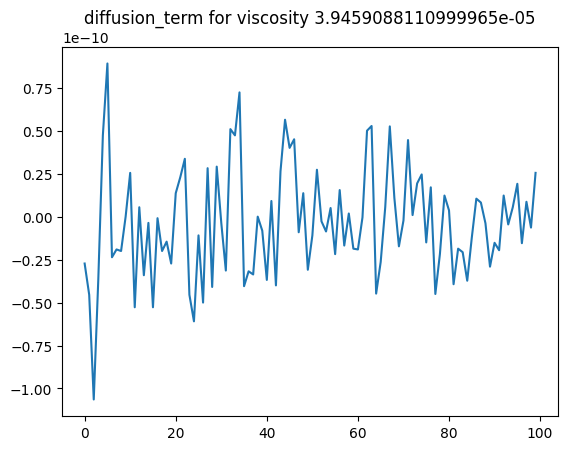

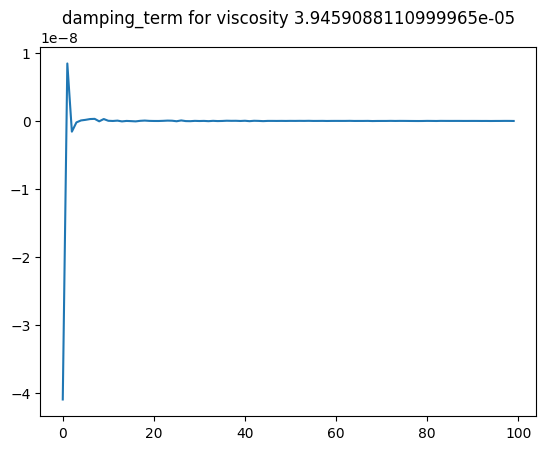

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
# viscositiesgpuone = ("1.0388823104027935e-05")
# viscositiesgputwo = ("3.9459088110999965e-05")
# viscositiesgputhree = ("0.00030296104428212476")
# viscositiesgpufour = ("0.0019158219548093154"
params = ["1.0388823104027935e-05", "3.9459088110999965e-05", "0.00030296104428212476", "0.0019158219548093154"]
for param in params[:2]:
    root = f"/data/divyam123/meta-cfd/jaxcfd_fields/2dtf_{param}_512_end_save/index_1/"

    terms = ["vorticity", "w_dx", "w_dy", "advection", "diffusion_term", "damping_term"]

    vorticity = np.load(os.path.join(root, "vorticity.npy"))
    w_dx = np.load(os.path.join(root, "w_dx.npy"))
    w_dy = np.load(os.path.join(root, "w_dy.npy"))
    advection = np.load(os.path.join(root, "advection.npy"))
    diffusion_term = np.load(os.path.join(root, "diffusion_term.npy"))
    damping_term = np.load(os.path.join(root, "damping_term.npy"))
    nt, nx, ny = vorticity.shape
    y = np.linspace(0, 2*np.pi, ny)
    forced_mode = 2
    forcing_func = forced_mode * np.cos(forced_mode * y)
    forcing_func = np.reshape(forcing_func, (1, 1, ny))
    forcing_func = np.broadcast_to(forcing_func, vorticity.shape)

    dt = 0.0008765604502203664
    dwdt = np.gradient(vorticity,dt, axis=0)

    residual = -dwdt - advection + diffusion_term - damping_term + forcing_func


    plt.plot(residual.mean(axis=(1,2))[:100])
    # plt.yscale("log")
    plt.title(f"Residual for viscosity {param}")
    plt.show()

    for term in terms:
        plt.plot(np.load(os.path.join(root, f"{term}.npy")).mean(axis=(1,2))[:100])
        plt.title(f"{term} for viscosity {param}")
        plt.show()

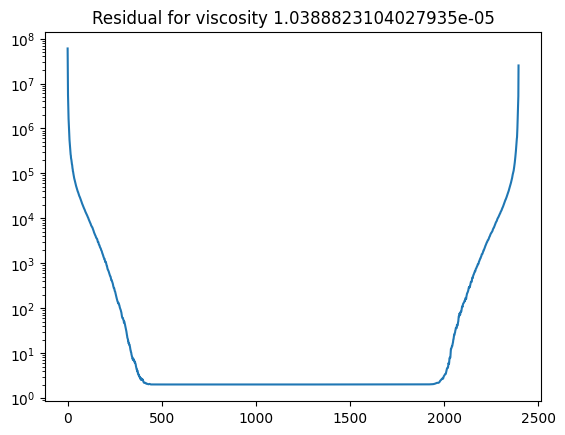

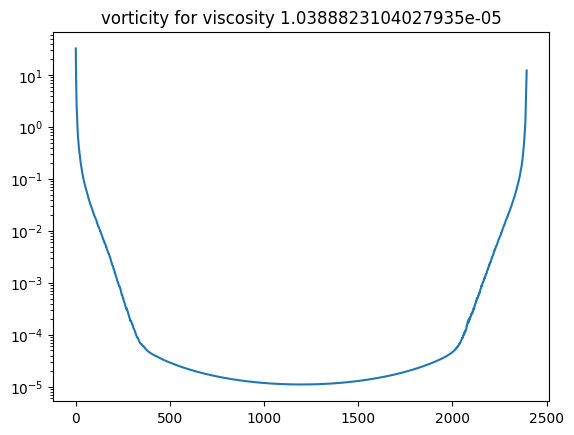

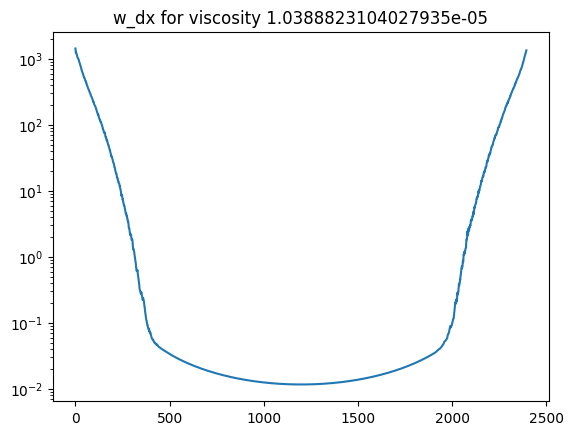

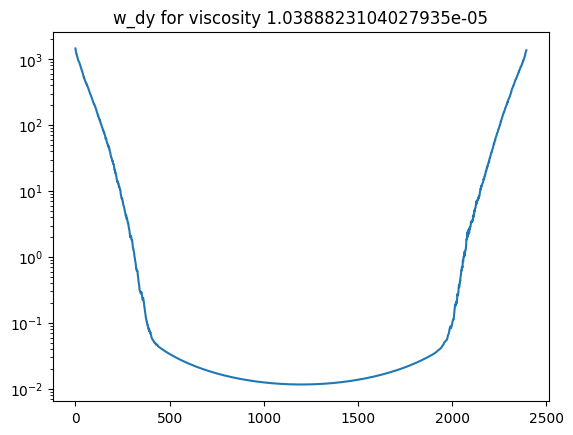

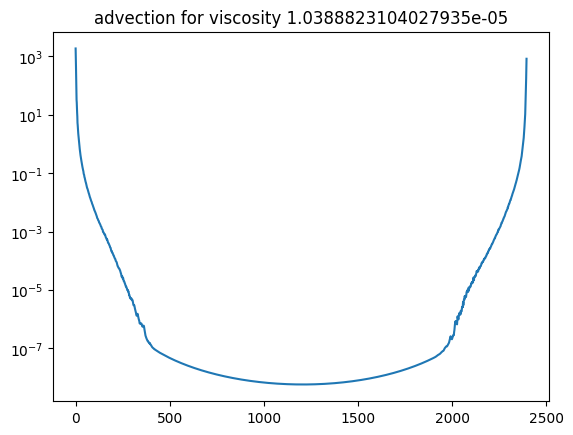

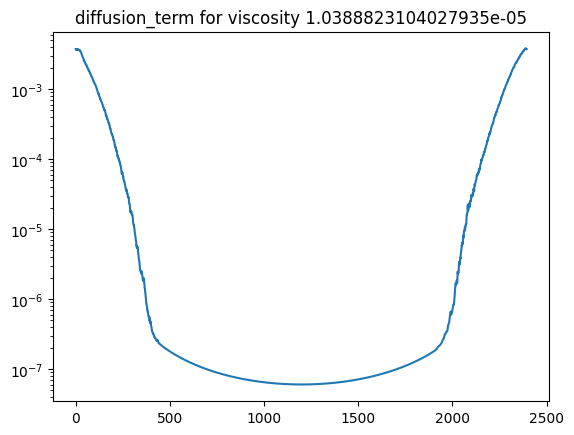

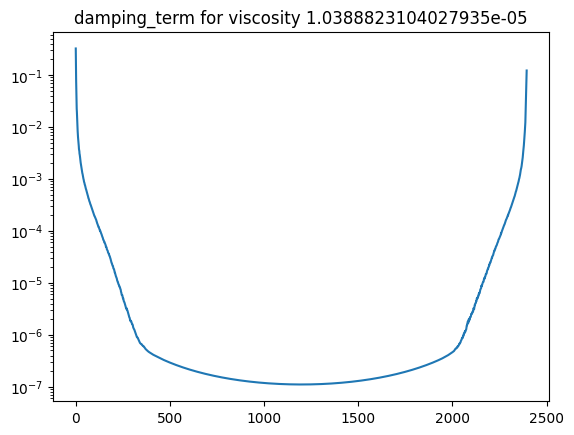

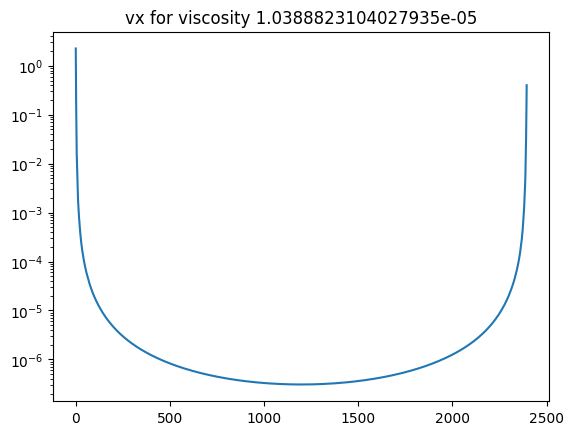

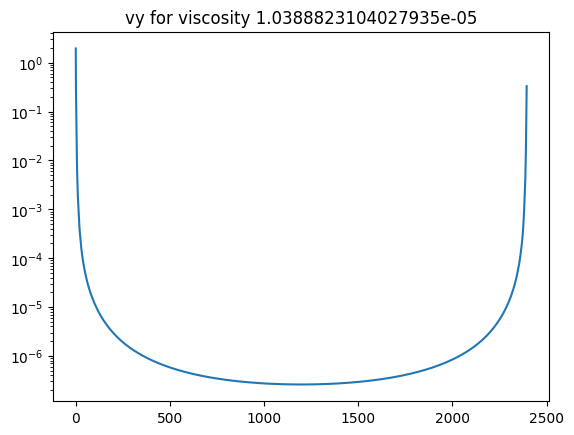

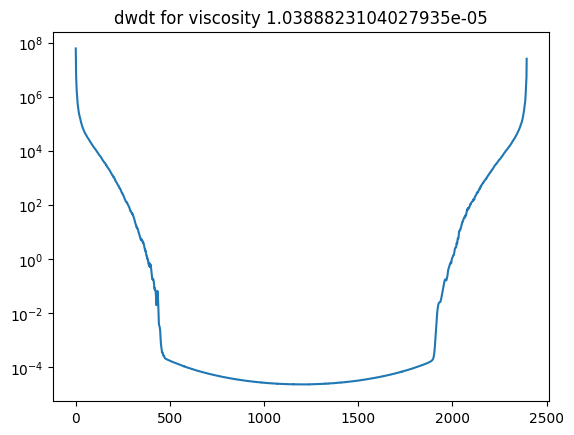

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
# viscositiesgpuone = ("1.0388823104027935e-05")
# viscositiesgputwo = ("3.9459088110999965e-05")
# viscositiesgputhree = ("0.00030296104428212476")
# viscositiesgpufour = ("0.0019158219548093154"
params = ["1.0388823104027935e-05", "3.9459088110999965e-05",
          "0.00030296104428212476", "0.0019158219548093154"]
for param in params[:1]:
    root = f"/data/divyam123/meta-cfd/jaxcfd_fields/2dtf_{param}_512_end_save/index_1/"

    terms = ["vorticity", "w_dx", "w_dy",
             "advection", "diffusion_term", "damping_term", "vx", "vy","dwdt"]

    vorticity = np.load(os.path.join(root, "vorticity.npy"))
    w_dx = np.load(os.path.join(root, "w_dx.npy"))
    w_dy = np.load(os.path.join(root, "w_dy.npy"))
    advection = np.load(os.path.join(root, "advection.npy"))
    diffusion_term = np.load(os.path.join(root, "diffusion_term.npy"))
    damping_term = np.load(os.path.join(root, "damping_term.npy"))
    nt, nx, ny = vorticity.shape
    y = np.linspace(0, 2*np.pi, ny)
    forced_mode = 2
    forcing_func = forced_mode * np.cos(forced_mode * y)
    forcing_func = np.reshape(forcing_func, (1, 1, ny))
    forcing_func = np.broadcast_to(forcing_func, vorticity.shape)

    dt = 0.0008765604502203664
    dwdt = np.gradient(vorticity, dt, axis=0)

    residual = -dwdt - advection + diffusion_term - damping_term + forcing_func

    plt.plot((residual ** 2).mean(axis=(1, 2))[:])
    plt.yscale("log")
    plt.title(f"Residual for viscosity {param}")
    plt.show()

    for term in terms:
        if term == "dwdt":
            plt.plot((dwdt ** 2).mean(axis=(1, 2))[:])
            plt.title(f"dwdt for viscosity {param}")
            plt.yscale("log")
            plt.show()
        else:
            plt.plot((np.load(os.path.join(root, f"{term}.npy")) ** 2).mean(
                axis=(1, 2))[:])
            plt.title(f"{term} for viscosity {param}")
            plt.yscale("log")
            plt.show()


In [35]:
(residual ** 2).mean(axis=(1,2)).min()

2.0032230279401118